# HOMEWORK 5 - HIGH FREQUENCY WORDS

Molly Siebecker and Marley Myrianthopoulos

CUNY SPS

DATA 620

SUMMER 2024

1. Choose a corpus of interest.

We will use the collection of Presidential Inaugural Addresses from the nltk corpus.

In [1]:
import nltk
import re
from nltk.corpus import inaugural
from nltk.text import Text
from nltk.probability import FreqDist

In [2]:
words = inaugural.words()
inaugural_text = Text(words)

2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).

We are defining unique words as strings of alphabetic characters, regardless of case, which may not include any punctuation besides an apostrophe. This will ensure that contractions are counted as unique words (and that strings that frequently follow an apostrophe like 's' and 'll' are not counted as unique words.) We are ignoring case so that we do not define 'Fellow' and 'fellow' as two different words. We are also excluding digits and other punctuation marks.

In [3]:
# converts all alphabetic characters to lowercase

lowercase_text = ' '.join(word.lower() for word in inaugural_text)
print(lowercase_text[:50])

fellow - citizens of the senate and of the house o


In [4]:
# finds all words, including contractions
pattern_alpha_apos = re.compile(r"\b[a-z']+\b")

inaugural_words = re.findall(pattern_alpha_apos, lowercase_text)
print(inaugural_words[:10])


['fellow', 'citizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of']


In [5]:
# finds unique words
inaugural_set_filtered = {word for word in inaugural_words if pattern_alpha_apos.match(word)}
sorted_unique_words = sorted(inaugural_set_filtered)
print(sorted_unique_words[:10])

['a', 'abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding']


In [6]:
# finds number of unique words
num_unique_words = len(sorted_unique_words)
num_unique_words

9172

In total, there are 9,172 unique words in the corpus.

3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [7]:
# finds number of words (not unique)
num_words = len(inaugural_words)
num_words

138269

In [8]:
# finds half the total number of words
half_total_words = 0.5*num_words
half_total_words

69134.5

In [9]:
# creates a frequency distribution
fdist = FreqDist(inaugural_words)
fdist

FreqDist({'the': 10195, 'of': 7185, 'and': 5409, 'to': 4601, 'in': 2829, 'a': 2294, 'our': 2224, 'we': 1839, 'that': 1820, 'be': 1505, ...})

In [10]:
cumulative_counts = []
cumulative_sum = 0

# finds cumulative count for each word
for word, count in fdist.most_common():
    cumulative_sum += count
    cumulative_counts.append((word, cumulative_sum))

# prints first ten cumulative counts
for word, cumulative_count in cumulative_counts[:10]:
    print(f"{word}: {cumulative_count}")


the: 10195
of: 17380
and: 22789
to: 27390
in: 30219
a: 32513
our: 34737
we: 36576
that: 38396
be: 39901


In [11]:
# finds row where cumulative count is at least half the total number of words

for idx, (word, cumulative_count) in enumerate(cumulative_counts):
    if cumulative_count >= half_total_words:
        print(f"Row {idx+1}: '{word}' with cumulative count {cumulative_count}")
        break

Row 57: 'every' with cumulative count 69147


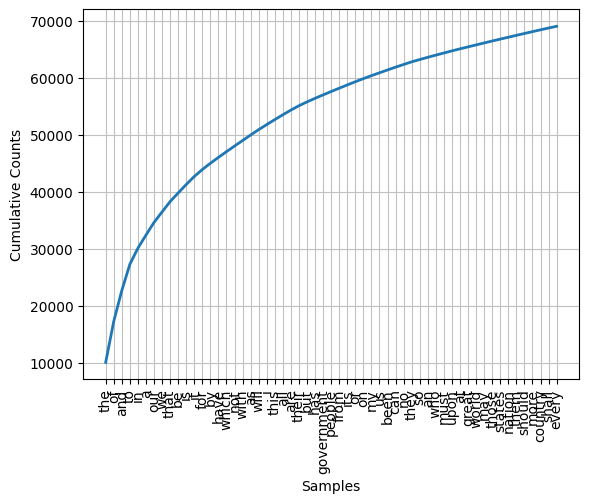

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [12]:
fdist.plot(57, cumulative=True)

57 unique words represent half of the total words in the corpus.

4. Identify the 200 highest frequency words in this corpus.

In [13]:
# finds the 200 highest frequency words

most_common_words = fdist.most_common(200)
most_common_words_only = [word for word, freq in most_common_words]
print(most_common_words_only)

['the', 'of', 'and', 'to', 'in', 'a', 'our', 'we', 'that', 'be', 'is', 'it', 'for', 'by', 'have', 'which', 'not', 'with', 'as', 'will', 'i', 'this', 'all', 'are', 'their', 'but', 'has', 'government', 'people', 'from', 'its', 'or', 'on', 'my', 'us', 'been', 'can', 'no', 'they', 'so', 'an', 'who', 'must', 'upon', 'at', 'great', 'world', 'may', 'those', 'states', 'nation', 'them', 'should', 'more', 'country', 'shall', 'every', 'these', 'if', 'any', 'was', 'one', 'other', 'there', 'peace', 'new', 'own', 'citizens', 'only', 'than', 'do', 's', 'power', 'america', 'now', 'public', 'time', 'you', 'when', 'such', 'would', 'his', 'constitution', 'united', 'under', 'nations', 'me', 'union', 'freedom', 'war', 'free', 'what', 'most', 'american', 'let', 'fellow', 'national', 'made', 'good', 'men', 'make', 'years', 'well', 'justice', 'were', 'life', 'without', 'spirit', 'rights', 'never', 'law', 'had', 'before', 'each', 'into', 'congress', 'laws', 'just', 'your', 'work', 'liberty', 'right', 'best', '

5. Create a graph that shows the relative frequency of these 200 words.

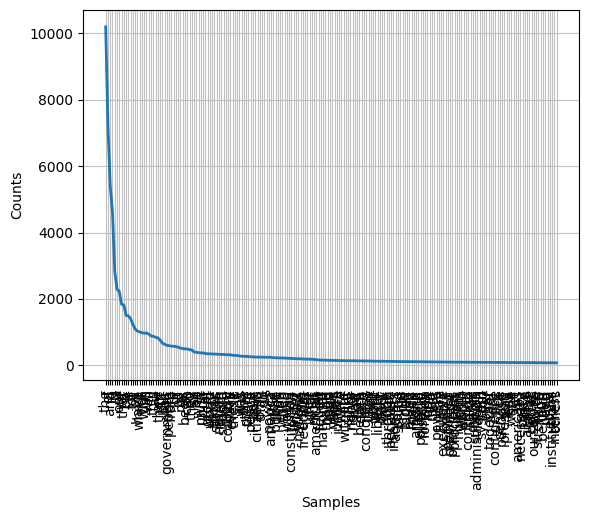

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
fdist.plot(200, cumulative=False)

6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

In [15]:
# splits most_common_words into frequencies and ranks

frequencies = [freq for word, freq in most_common_words]
ranks = range(1, len(frequencies) + 1)

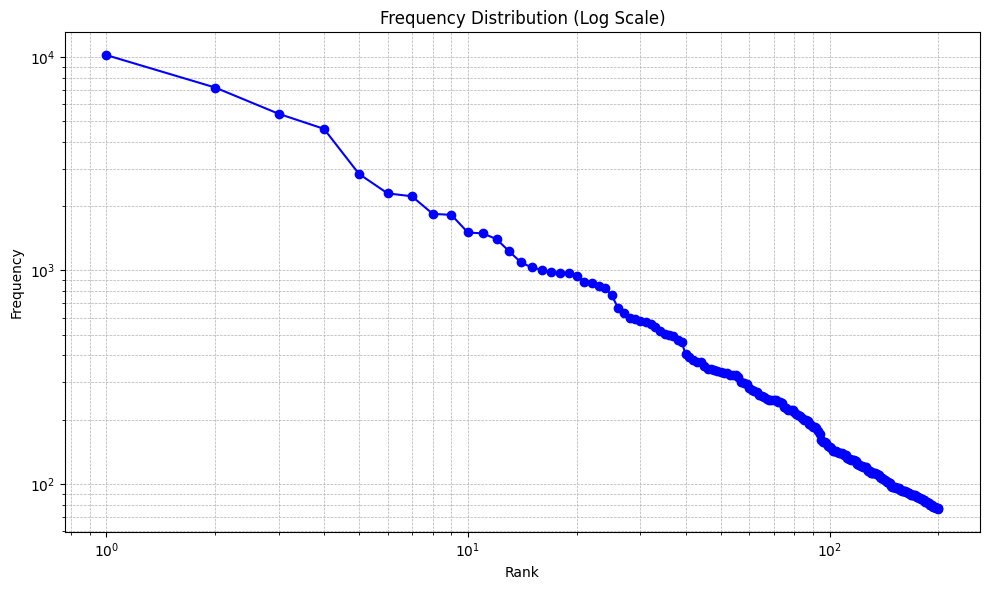

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(ranks, frequencies, marker='o', linestyle='-', color='b', label='Word Frequencies')

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Frequency Distribution (Log Scale)')
plt.yscale('log')
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

Zipf's law states than a word's frequency in a text is inversely proportional to its rank. So the most common word would be used twice as much as the second most common word, three times as often as the third, etc. We can see this trend in the frequency distribution of the 200 most common words, but we can confirm it by using a logarithmic scale. Since the frequency distribution using the logarithmic scale is approximately linear, this confirms that the relative frequency of the words follows Zipf's law.


7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

From the perspective of Zipf's law, we believe that the frequency of the words in this corpus would be very similar to "all words in all corpora," that is, the word frequency distribution is broadly consistent with Zipf's law both in this corpus and all words in all corpora.

From the perspective of specific words, we believe that the most frequent words in this corpus would be similar to the most frequent words from all words in all corpora. The ten most frequent words in this corpus are "the", "of", "and", "to", "in", "a", "our", "we", "that", and "be", all of which are extremely common English words in all corpora. However, some of the high frequency words in this corpus are context dependent and would be less common in all corpora, such as "government" (#28), "states" (#50), or "nation" (#51), which in this corpus appear with more frequency than common English words like "them" (#52) and "every" (#57).